In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./car_data.csv')

In [3]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
print(data.shape)

(1000, 5)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


* 라벨 인코딩을 사용하여 Gender의 값을 숫자로 변경시킨다

In [6]:
dict = { 'Male':0, 'Female':1}

In [7]:
data['Gender_en'] = data['Gender'].map(dict).astype('int32')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
 5   Gender_en     1000 non-null   int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 43.1+ KB


(array([484.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 516.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

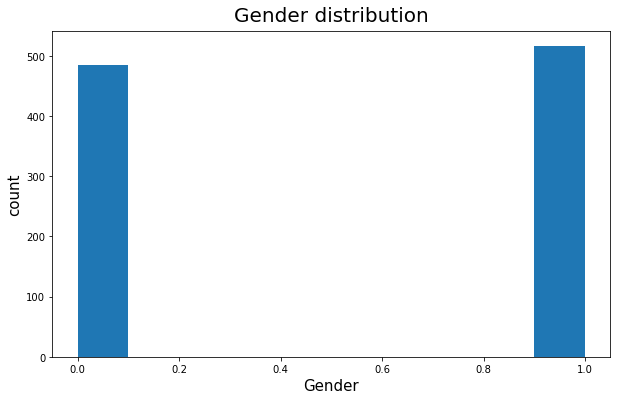

In [9]:
# 성별 분포 남성:0, 여성:1
plt.figure(figsize=(10,6))
plt.title("Gender distribution", fontsize=20, y=1.01)  
plt.xlabel("Gender", fontsize=15)            
plt.ylabel("count", fontsize=15)            
plt.hist(data['Gender_en'])

(array([ 51.,  63., 119.,  91., 207., 133., 138.,  75.,  62.,  61.]),
 array([18. , 22.5, 27. , 31.5, 36. , 40.5, 45. , 49.5, 54. , 58.5, 63. ]),
 <BarContainer object of 10 artists>)

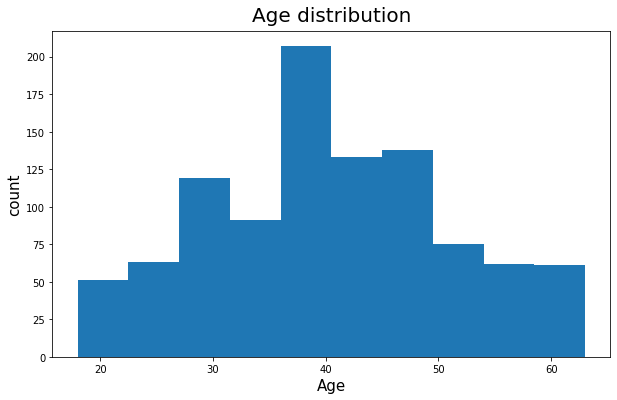

In [10]:
plt.figure(figsize=(10,6))
plt.title("Age distribution", fontsize=20, y=1.01)  
plt.xlabel("Age", fontsize=15)            
plt.ylabel("count", fontsize=15)            
plt.hist(data['Age'])

(array([598.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 402.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

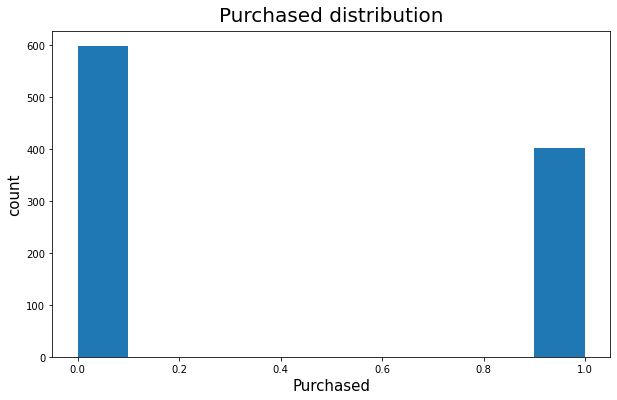

In [11]:
# no:0, yes:1
plt.figure(figsize=(10,6))
plt.title("Purchased distribution", fontsize=20, y=1.01)  
plt.xlabel("Purchased", fontsize=15)            
plt.ylabel("count", fontsize=15)            
plt.hist(data['Purchased'])

In [12]:
data.corr()['Purchased']

User ID         0.015911
Age             0.616036
AnnualSalary    0.364974
Purchased       1.000000
Gender_en       0.047211
Name: Purchased, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
md_lr = LinearRegression()
md_kn = KNeighborsClassifier()
md_dt = DecisionTreeClassifier()
md_svc = SVC()
md_rf =RandomForestClassifier(random_state=1)
md_logr =LogisticRegression()

### Purchased 상관관계
* User ID         0.015911
* Age             0.616036
* AnnualSalary    0.364974
* Purchased       1.000000
* Gender_en       0.047211

Age, AnnualSalary가 유의미한 상관관계가 있음
 * Age, AnnualSalary를 이용한 모델

In [16]:
sel = ['Age','AnnualSalary']
X = data[sel]
y = data['Purchased']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y,
                                                   random_state=0)

In [18]:
md_lr.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_lr.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_lr.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_lr, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_lr, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_lr, X_test, y_test, cv=5))

학습용 모델 평가점수 : 0.45988645791711547
테스트용 모델 평가점수 : 0.42091203015165757
교차검증 모델 평가점수: [0.42401048 0.46708151 0.52539134 0.41091534 0.41317926]
교차검증 모델 평가점수(학습용): [0.40262012 0.40594668 0.45810987 0.51094574 0.45568842]
교차검증 모델 평가점수(평가용): [0.44450366 0.47135165 0.37709033 0.3630048  0.35246138]


In [19]:
md_kn.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_kn.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_kn.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_kn, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_kn, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_kn, X_test, y_test, cv=5))
pred = md_kn.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.8653333333333333
테스트용 모델 평가점수 : 0.8
교차검증 모델 평가점수: [0.78  0.8   0.825 0.82  0.81 ]
교차검증 모델 평가점수(학습용): [0.79333333 0.76       0.84666667 0.80666667 0.84      ]
교차검증 모델 평가점수(평가용): [0.78 0.76 0.82 0.78 0.86]
F1 score : 0.7368421052631577


In [20]:
md_dt.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_dt.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_dt.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_dt, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_dt, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_dt, X_test, y_test, cv=5))
pred = md_dt.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.9946666666666667
테스트용 모델 평가점수 : 0.864
교차검증 모델 평가점수: [0.845 0.855 0.89  0.86  0.845]
교차검증 모델 평가점수(학습용): [0.88666667 0.82666667 0.85333333 0.86666667 0.88666667]
교차검증 모델 평가점수(평가용): [0.88 0.92 0.82 0.88 0.88]
F1 score : 0.83


In [21]:
md_svc.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_svc.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_svc.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_svc, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_svc, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_svc, X_test, y_test, cv=5))
pred = md_svc.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.756
테스트용 모델 평가점수 : 0.764
교차검증 모델 평가점수: [0.755 0.75  0.76  0.75  0.785]
교차검증 모델 평가점수(학습용): [0.73333333 0.69333333 0.82       0.72666667 0.78      ]
교차검증 모델 평가점수(평가용): [0.72 0.82 0.84 0.72 0.74]
F1 score : 0.6040268456375839


In [22]:
md_rf.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_rf.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_rf.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_rf, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_rf, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_rf, X_test, y_test, cv=5))
pred = md_rf.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.9946666666666667
테스트용 모델 평가점수 : 0.868
교차검증 모델 평가점수: [0.855 0.885 0.91  0.87  0.905]
교차검증 모델 평가점수(학습용): [0.86666667 0.86       0.89333333 0.87333333 0.92      ]
교차검증 모델 평가점수(평가용): [0.86 0.92 0.84 0.94 0.9 ]
F1 score : 0.8390243902439023


In [23]:
md_logr.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_logr.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_logr.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_logr, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_logr, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_logr, X_test, y_test, cv=5))
pred = md_logr.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.6066666666666667
테스트용 모델 평가점수 : 0.596
교차검증 모델 평가점수: [0.6   0.55  0.6   0.565 0.595]
교차검증 모델 평가점수(학습용): [0.6        0.4        0.55333333 0.59333333 0.59333333]
교차검증 모델 평가점수(평가용): [0.78 0.6  0.6  0.5  0.6 ]
F1 score : 0.2170542635658915


### Age, AnnualSalary를 이용한 모델
- RandomForestClassifier가 결과가 높게 나온다.

In [24]:
sel = ['Age','AnnualSalary','Gender_en']
X = data[sel]
y = data['Purchased']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y,
                                                   random_state=0)

In [26]:
md_lr.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_lr.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_lr.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_lr, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_lr, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_lr, X_test, y_test, cv=5))
# 'Age','AnnualSalary'를 이용한 전의 학습 모델과 비교할 때
# 학습용 높음, 테스트용 낮음, 교차검증 높음, 학습용 높음, 평가용 낮음

학습용 모델 평가점수 : 0.4608366540382606
테스트용 모델 평가점수 : 0.4188255450102226
교차검증 모델 평가점수: [0.42493214 0.46623236 0.52629391 0.41175926 0.4064445 ]
교차검증 모델 평가점수(학습용): [0.40533571 0.39248724 0.4607005  0.51293965 0.45480667]
교차검증 모델 평가점수(평가용): [0.44430556 0.47102236 0.36746423 0.36170557 0.34791661]


In [27]:
md_kn.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_kn.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_kn.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_kn, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_kn, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_kn, X_test, y_test, cv=5))
pred = md_kn.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.8653333333333333
테스트용 모델 평가점수 : 0.8
교차검증 모델 평가점수: [0.785 0.795 0.83  0.82  0.81 ]
교차검증 모델 평가점수(학습용): [0.79333333 0.76       0.84       0.8        0.84      ]
교차검증 모델 평가점수(평가용): [0.78 0.76 0.82 0.78 0.86]
F1 score : 0.7368421052631577


In [28]:
md_dt.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_dt.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_dt.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_dt, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_dt, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_dt, X_test, y_test, cv=5))
pred = md_dt.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.996
테스트용 모델 평가점수 : 0.888
교차검증 모델 평가점수: [0.865 0.875 0.9   0.875 0.87 ]
교차검증 모델 평가점수(학습용): [0.9        0.84666667 0.88666667 0.88       0.88      ]
교차검증 모델 평가점수(평가용): [0.9  0.9  0.82 0.88 0.86]
F1 score : 0.8571428571428572


In [29]:
md_svc.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_svc.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_svc.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_svc, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_svc, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_svc, X_test, y_test, cv=5))
pred = md_svc.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.752
테스트용 모델 평가점수 : 0.756
교차검증 모델 평가점수: [0.76  0.745 0.75  0.745 0.78 ]
교차검증 모델 평가점수(학습용): [0.72666667 0.7        0.81333333 0.72       0.77333333]
교차검증 모델 평가점수(평가용): [0.72 0.8  0.82 0.68 0.74]
F1 score : 0.5850340136054422


In [30]:
md_rf.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_rf.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_rf.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_rf, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_rf, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_rf, X_test, y_test, cv=5))
pred = md_rf.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.996
테스트용 모델 평가점수 : 0.904
교차검증 모델 평가점수: [0.88  0.89  0.925 0.88  0.905]
교차검증 모델 평가점수(학습용): [0.88       0.86       0.90666667 0.88       0.89333333]
교차검증 모델 평가점수(평가용): [0.84 0.92 0.86 0.92 0.9 ]
F1 score : 0.88


In [31]:
md_logr.fit(X_train,y_train)
print('학습용 모델 평가점수 :', md_logr.score(X_train, y_train))
print('테스트용 모델 평가점수 :',md_logr.score(X_test, y_test))
print('교차검증 모델 평가점수:',cross_val_score(md_logr, X, y, cv=5))
print('교차검증 모델 평가점수(학습용):',cross_val_score(md_logr, X_train, y_train, cv=5))
print('교차검증 모델 평가점수(평가용):',cross_val_score(md_logr, X_test, y_test, cv=5))
pred = md_logr.predict(X_test)
print('F1 score :', f1_score(y_test, pred))

학습용 모델 평가점수 : 0.6093333333333333
테스트용 모델 평가점수 : 0.596
교차검증 모델 평가점수: [0.6   0.545 0.6   0.565 0.595]
교차검증 모델 평가점수(학습용): [0.60666667 0.4        0.55333333 0.59333333 0.59333333]
교차검증 모델 평가점수(평가용): [0.78 0.6  0.6  0.5  0.6 ]
F1 score : 0.22900763358778625


### 'Age','AnnualSalary','Gender_en'를 사용한 모델
- RandomForestClassifier가 결과가 높게 나온다